# TSNE from NIPS4Bplus


In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import metrics

from PIL import Image


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from bring_features_and_file_paths import bring_features_and_file_paths

## Bring all the features and file paths

In [2]:
features, file_paths = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/Features', sub_sample=None)

We have 6703 feature vectors.


In [3]:
features.shape

torch.Size([6703, 384])

In [5]:
pca = PCA(n_components=50, svd_solver='full')
pca.fit(features)
pca_features = pca.transform(features)
pca_features.shape

(6703, 50)

In [6]:
dpath='/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/TSNE_Data/'
#dpath='/grand/projects/BirdAudio/Soundscapes/TSNE_Data/Clusters/'
fname='f_embedded.npy'
if not os.path.isfile(os.path.join(dpath, fname)):
    #f_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=10).fit_transform(pca_features)
    f_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=50).fit_transform(pca_features)
    f_embedded.shape
    np.save(os.path.join(dpath, fname), f_embedded)
else:
    f_embedded = np.load(os.path.join(dpath, fname))

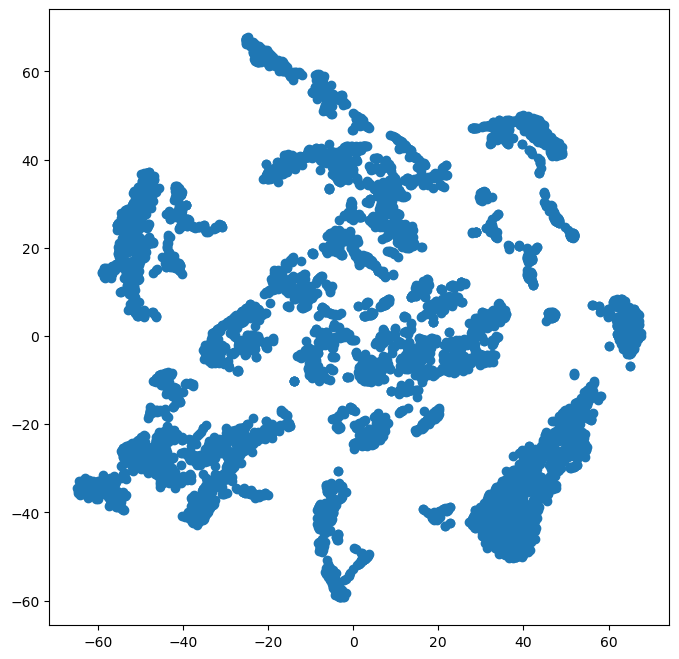

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(f_embedded[:,0],f_embedded[:,1])

In [8]:
labels = DBSCAN(eps=1.2, min_samples=5).fit_predict(f_embedded)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)
#set(label_predictions)

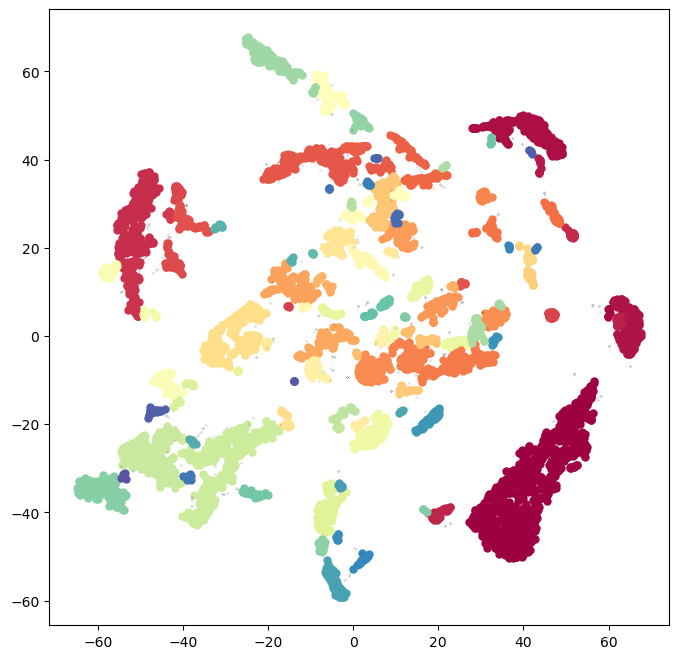

In [9]:
# Black removed and is used for noise instead.
print_outliers=True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    #class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        #markeredgecolor="k",
        markeredgecolor=col,
        markersize=5,
#         markersize=0.25,
    )

    if print_outliers:
        xy = f_embedded[class_member_mask & ~core_samples_mask]
        ax.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=0.1,
        )

fig.set_size_inches(8, 8)

In [10]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_points_ = labels.shape[0]


print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Estimated number of labeled points: %d" % n_points_)
print(int(100*n_noise_/n_points_), "% of points in the data is noise")

Estimated number of clusters: 117
Estimated number of noise points: 226
Estimated number of labeled points: 6703
3 % of points in the data is noise


In [11]:
features=f_embedded
labels=labels

In [12]:
image_paths=[]
features=[]
LABELS=[]
for fpath, feat, label in zip(file_paths,f_embedded,labels):
    if label != -1:
        file_path = ''.join([chr(int(x)) for x in fpath]).replace('~','')
        image_paths.append(file_path[1:])
        features.append(feat)
        LABELS.append(label)
        print(file_path[1:])

image_paths=np.array(image_paths)
features=np.array(features)
labels=np.array(LABELS)

/Spectrogram_Images/test/nips4b_birds_testfile0001_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0001_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0001_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0001_3.png
/Spectrogram_Images/test/nips4b_birds_testfile0001_4.png
/Spectrogram_Images/test/nips4b_birds_testfile0002_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0002_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0002_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0002_3.png
/Spectrogram_Images/test/nips4b_birds_testfile0002_4.png
/Spectrogram_Images/test/nips4b_birds_testfile0003_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0003_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0003_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0003_3.png
/Spectrogram_Images/test/nips4b_birds_testfile0003_4.png
/Spectrogram_Images/test/nips4b_birds_testfile0004_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0004_1.png
/Spectrogram_Images/test/nips4b

/Spectrogram_Images/test/nips4b_birds_testfile0438_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0438_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0438_3.png
/Spectrogram_Images/test/nips4b_birds_testfile0438_4.png
/Spectrogram_Images/test/nips4b_birds_testfile0439_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0439_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0440_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0440_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0441_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0441_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0441_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0441_3.png
/Spectrogram_Images/test/nips4b_birds_testfile0441_4.png
/Spectrogram_Images/test/nips4b_birds_testfile0442_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0442_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0443_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0443_1.png
/Spectrogram_Images/test/nips4b

/Spectrogram_Images/test/nips4b_birds_testfile0928_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0929_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0929_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0929_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0930_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0930_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0930_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0930_3.png
/Spectrogram_Images/test/nips4b_birds_testfile0930_4.png
/Spectrogram_Images/test/nips4b_birds_testfile0931_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0931_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0931_2.png
/Spectrogram_Images/test/nips4b_birds_testfile0931_3.png
/Spectrogram_Images/test/nips4b_birds_testfile0931_4.png
/Spectrogram_Images/test/nips4b_birds_testfile0932_0.png
/Spectrogram_Images/test/nips4b_birds_testfile0932_1.png
/Spectrogram_Images/test/nips4b_birds_testfile0932_2.png
/Spectrogram_Images/test/nips4b

/Spectrogram_Images/train/nips4b_birds_trainfile436_4.png
/Spectrogram_Images/train/nips4b_birds_trainfile437_0.png
/Spectrogram_Images/train/nips4b_birds_trainfile437_1.png
/Spectrogram_Images/train/nips4b_birds_trainfile438_0.png
/Spectrogram_Images/train/nips4b_birds_trainfile438_1.png
/Spectrogram_Images/train/nips4b_birds_trainfile438_2.png
/Spectrogram_Images/train/nips4b_birds_trainfile438_3.png
/Spectrogram_Images/train/nips4b_birds_trainfile438_4.png
/Spectrogram_Images/train/nips4b_birds_trainfile440_0.png
/Spectrogram_Images/train/nips4b_birds_trainfile440_1.png
/Spectrogram_Images/train/nips4b_birds_trainfile440_2.png
/Spectrogram_Images/train/nips4b_birds_trainfile440_3.png
/Spectrogram_Images/train/nips4b_birds_trainfile440_4.png
/Spectrogram_Images/train/nips4b_birds_trainfile441_0.png
/Spectrogram_Images/train/nips4b_birds_trainfile441_1.png
/Spectrogram_Images/train/nips4b_birds_trainfile441_2.png
/Spectrogram_Images/train/nips4b_birds_trainfile441_3.png
/Spectrogram_I

In [13]:
str(image_paths[0])

'/Spectrogram_Images/test/nips4b_birds_testfile0001_0.png'

In [14]:
# Generate dataframe
df = pd.DataFrame(
   dict(
      x=features[:,0],
      y=features[:,1],
      paths=image_paths,
      labels=labels
   )
)

In [15]:
df

,x,y,paths,labels
0,40.490501,-38.059063,/Spectrogram_Images/test/nips4b_birds_testfile...,0
1,40.339226,-41.614399,/Spectrogram_Images/test/nips4b_birds_testfile...,0
2,45.673542,-35.909348,/Spectrogram_Images/test/nips4b_birds_testfile...,0
3,53.410969,-24.217619,/Spectrogram_Images/test/nips4b_birds_testfile...,0
4,52.787895,-25.265070,/Spectrogram_Images/test/nips4b_birds_testfile...,0
...,...,...,...,...
6472,32.842472,-35.750973,/Spectrogram_Images/train/nips4b_birds_trainfi...,0
6473,34.721317,-39.053665,/Spectrogram_Images/train/nips4b_birds_trainfi...,0
6474,38.901699,-28.918774,/Spectrogram_Images/train/nips4b_birds_trainfi...,0
6475,36.681824,-32.822960,/Spectrogram_Images/train/nips4b_birds_trainfi...,0


In [16]:
df.to_csv(os.path.join(dpath, 'TSNE.csv'))

In [17]:
np.where(labels==-1)

(array([], dtype=int64),)

In [18]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = metrics.silhouette_score(df.loc[:, df.columns!='paths'], df['labels'])
print(
    "For n_clusters =",
    n_clusters_,
    "The average silhouette_score is :",
    silhouette_avg,
)

For n_clusters = 117 The average silhouette_score is : 0.45467949654163753


In [19]:
bird_species_df = pd.read_csv ('/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/nips4b_birdchallenge_espece_list.csv')
bird_species_df

,class number,class name,English_name,Scientific_name,type
0,none,Empty,Empty,noise sample,noise
1,1,Aegcau_call,Long-tailed Tit,Aegithalos caudatus,bird
2,2,Alaarv_song,Eurasian Skylark,Alauda arvensis,bird
3,3,Anttri_song,Tree Pipit,Anthus trivialis,bird
4,4,Butbut_call,Common Buzzard,Buteo buteo,bird
...,...,...,...,...,...
83,83,Trotro_song,Winter Wren,Troglodytes troglodytes,bird
84,84,Turmer_call,Common Blackbird,Turdus merula,bird
85,85,Turmer_song,Common Blackbird,Turdus merula,bird
86,86,Turphi_call,Song Thrush,Turdus philomelos,bird


In [20]:
bird_labels_df = pd.read_csv ('/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/nips4b_birdchallenge_train_labels.csv')
bird_labels_df=bird_labels_df.iloc[2:]
bird_labels_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
2,nips4b_birds_trainfile001.wav,3,NaN,­,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nips4b_birds_trainfile002.wav,1,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nips4b_birds_trainfile003.wav,2,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,nips4b_birds_trainfile004.wav,3,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
6,nips4b_birds_trainfile005.wav,3,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,nips4b_birds_trainfile684.wav,1,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686,nips4b_birds_trainfile685.wav,2,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
687,nips4b_birds_trainfile686.wav,3,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,nips4b_birds_trainfile687.wav,3,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_with_bird_labels=[]
for element in df.iterrows():
    if element[1]['paths'].split('/')[2]=='train':
        aux={}
        Filename=os.path.basename(element[1]['paths'][:-6]+'.wav')
        #print(Filename)
        aux['x']=element[1]['x']
        aux['y']=element[1]['y']
        aux['paths']=element[1]['paths']
        aux['labels']=element[1]['labels']
        vector=np.zeros([87], dtype=bool)
        for k, column in enumerate(bird_labels_df[bird_labels_df['Unnamed: 0']==Filename].iteritems()):
            if k > 3:
                #print(k-4)
                status=np.array(column[1])[0]
                if status=='1':
                    #print('Heyyyyyyy')
                    vector[k-4]=True
                    
        aux['bird_label']=vector
        
        df_with_bird_labels.append(aux)

df_with_bird_labels = pd.DataFrame(data=df_with_bird_labels)

/tmp/ipykernel_28782/186416709.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, column in enumerate(bird_labels_df[bird_labels_df['Unnamed: 0']==Filename].iteritems()):


In [23]:
data=df_with_bird_labels
data

,x,y,paths,labels,bird_label
0,42.404755,-41.079494,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, True, False, False, Fals..."
1,39.596298,-43.896355,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, True, False, False, Fals..."
2,40.020588,-45.048885,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, True, False, False, Fals..."
3,40.509357,-45.653446,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, True, False, False, Fals..."
4,34.649193,-46.049137,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, True, False, False, Fals..."
...,...,...,...,...,...
2650,32.842472,-35.750973,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, False, False, False, Fal..."
2651,34.721317,-39.053665,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, False, False, False, Fal..."
2652,38.901699,-28.918774,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, False, False, False, Fal..."
2653,36.681824,-32.822960,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,"[False, False, False, False, False, False, Fal..."


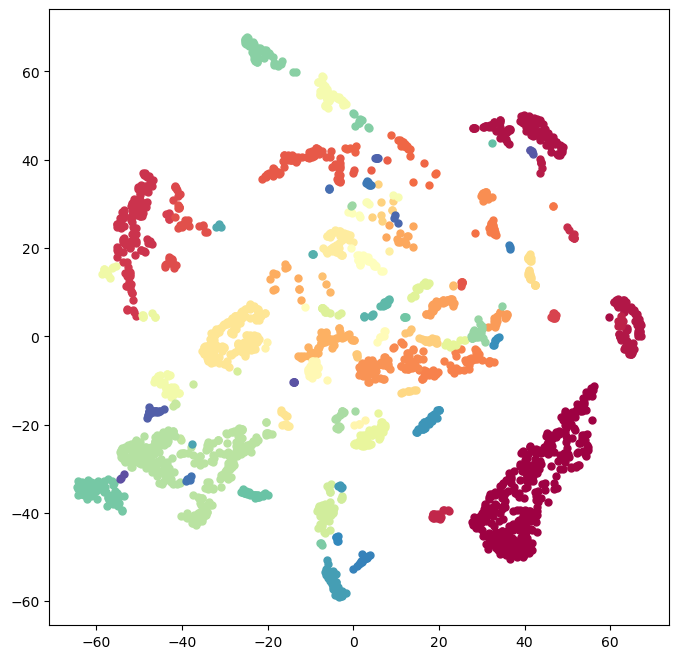

In [24]:
# Black removed and is used for noise instead.
column = 'labels'
labels = data[column]
f_embedded = np.transpose(np.array([data['x'], data['y']]))
unique_labels = set(data[column])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
patches=[]
for k, col in zip(unique_labels, colors):
    #print('Color ', col)
    #print('Label ', k)

    class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=5,
    )

    patch = mpatches.Patch(color=col, label=k)
    patches.append(patch)

#ax.legend(handles=patches)

fig.set_size_inches(8, 8)

In [25]:
df_with_bird_labels1=[]
for element in data.iterrows():
    indices=np.where(element[1]['bird_label'])
    aux={}
    aux['x']=element[1]['x']
    aux['y']=element[1]['y']
    aux['paths']=element[1]['paths']
    aux['labels']=element[1]['labels']
    if len(indices[0]) > 0:
        print('Yup')
        for index in indices[0]:
            aux['bird_label']=index
            df_with_bird_labels1.append(aux)
    else:
        print('Nope')
        aux['bird_label']=-1
        df_with_bird_labels1.append(aux)

df_with_bird_labels1 = pd.DataFrame(data=df_with_bird_labels1)

Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Nope
Nope
Nope
Nope
Nope
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Nope
Nope
Nope
Nope
Nope
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Nope
Nope
Nope
Nope
Yup
Yup
Yup
Yup
Nope
Nope
Nope
Nope
Nope
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Nope
Nope
Nope
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Nope
Nope
Nope
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Yup
Nope
Nope
Nope
Nope

In [26]:
data1=df_with_bird_labels1
data1

,x,y,paths,labels,bird_label
0,42.404755,-41.079494,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,42
1,42.404755,-41.079494,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,42
2,42.404755,-41.079494,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,42
3,39.596298,-43.896355,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,42
4,39.596298,-43.896355,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,42
...,...,...,...,...,...
5098,36.681824,-32.822960,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,58
5099,36.681824,-32.822960,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,58
5100,34.557594,-35.801563,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,58
5101,34.557594,-35.801563,/Spectrogram_Images/train/nips4b_birds_trainfi...,0,58


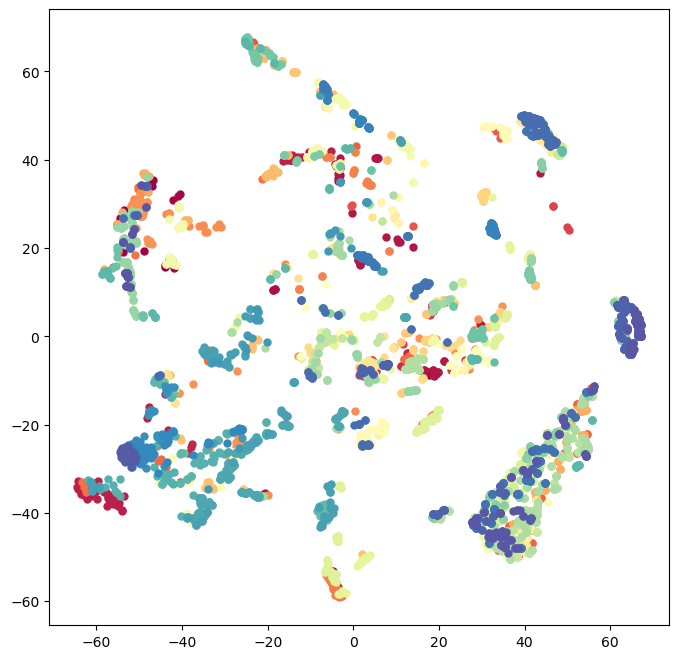

In [30]:
# Black removed and is used for noise instead.
column = 'bird_label'
labels = data1[column]
f_embedded = np.transpose(np.array([data1['x'], data1['y']]))
unique_labels = set(data1[column])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
patches=[]
for k, col in zip(unique_labels, colors):
    #print('Color ', col)
    #print('Label ', k)

    class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=5,
    )

    patch = mpatches.Patch(color=col, label=k)
    patches.append(patch)

#ax.legend(handles=patches)

fig.set_size_inches(8, 8)

In [31]:
data1.to_csv(os.path.join(dpath, 'TSNE_with_Bird_Labels.csv'))